# BIOS512 Assignment #2

📚 import the `TidyVerse` package. 📚

In [1]:
library('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Uncomment the code below and execute the following cell. This code provides a table for us called `ncaa_sports_spending`.

In [2]:
data_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-03-29/sports.csv'

ncaa_sports_spending = read_csv(data_url, col_types = cols()) |> 
    filter(sports == 'Basketball') |>
    pivot_longer(c(exp_men, exp_women), names_to = 'men_or_women', values_to = 'expenditure_usd') |>
    select(year, institution_name, men_or_women, expenditure_usd) |>
    mutate(men_or_women = str_replace(men_or_women, 'exp_', ''))

**Compare the spending on men's versus women's basketball over time using a bar chart.**

Either use an *encoding* or *facet* to plot separate bars for men and women.

(**Hint** you can use `geom_col` with `x` and `y` encodings so the bar height reflects spending.)

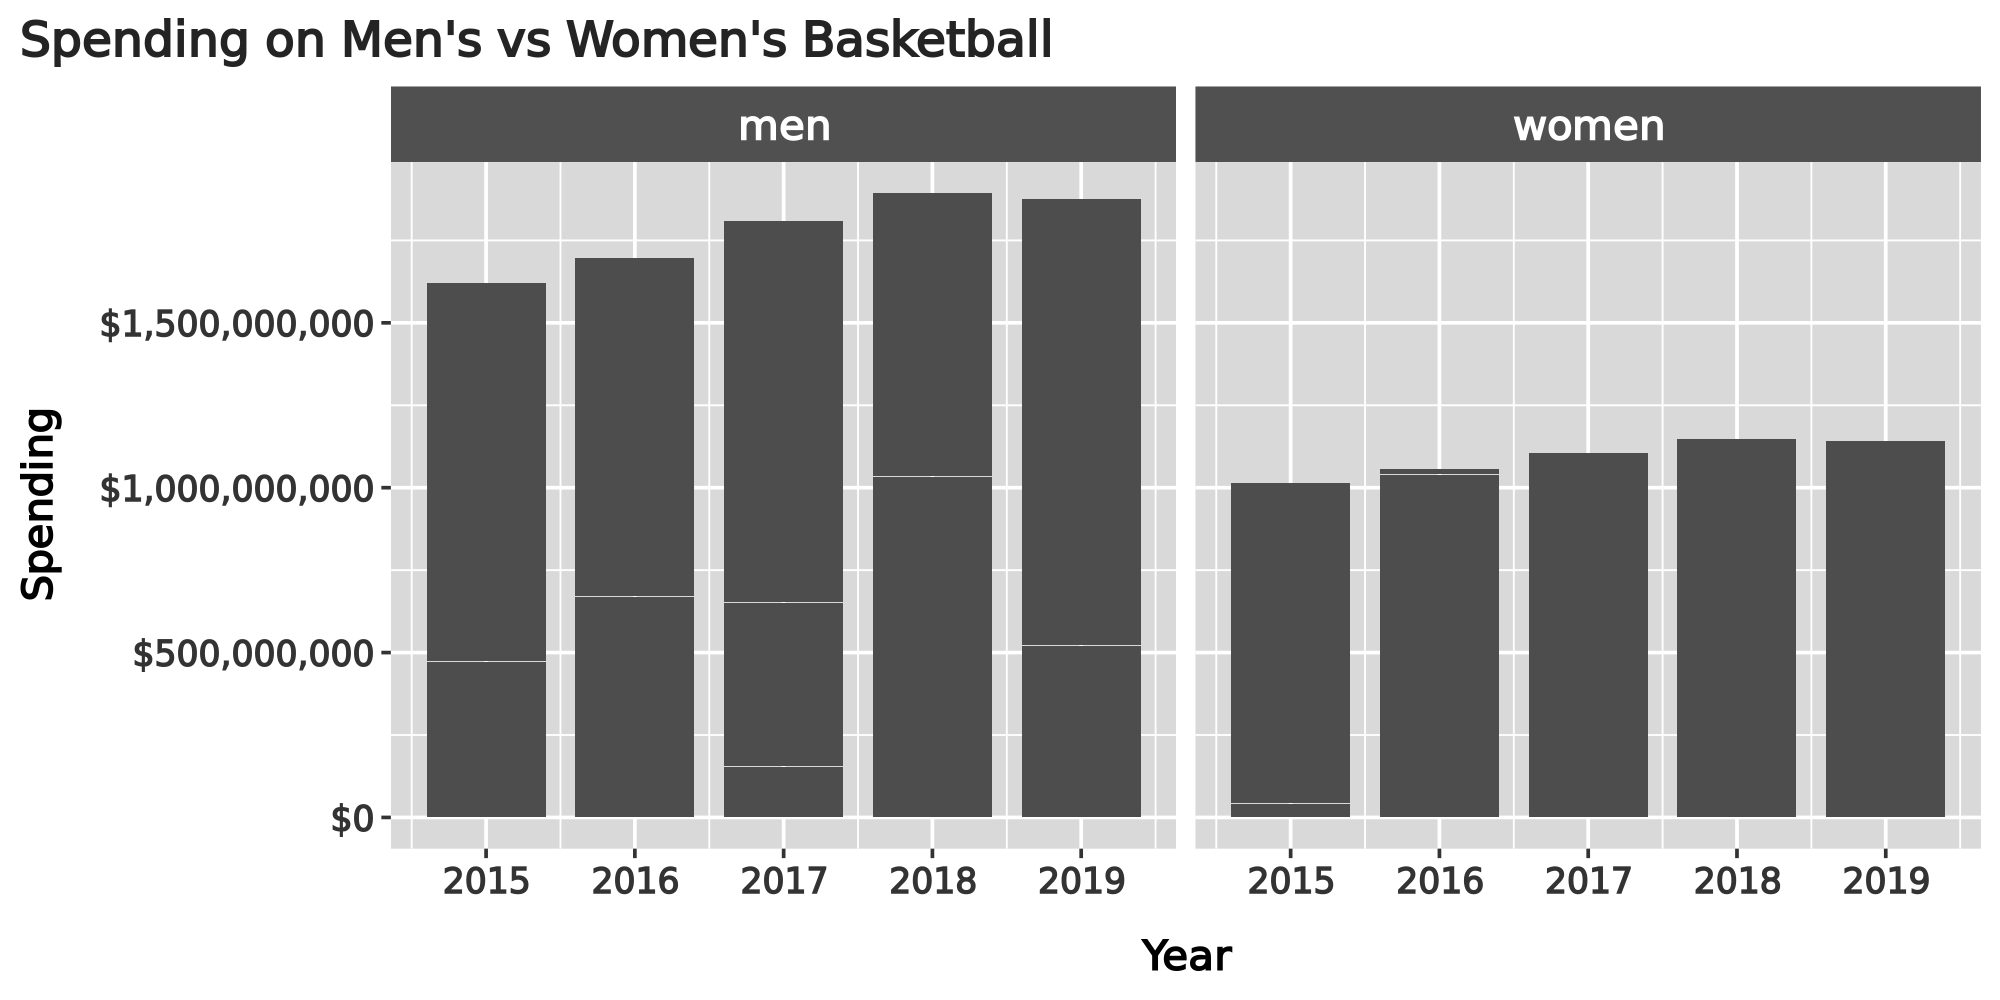

In [68]:
options(repr.plot.height = 4, repr.plot.width = 8, repr.plot.res = 250)

ggplot(ncaa_sports_spending, aes(x = year, y = expenditure_usd)) +
    geom_col(na.rm = T, fill = "#4d4d4d", width = 0.8) +  
    facet_wrap(~ men_or_women, scales = "free_x") +  
    scale_y_continuous(labels = scales::dollar_format()) +  
    labs(x = "Year", y = "Spending", title = "Spending on Men's vs Women's Basketball") +  
    #theme_minimal() +
    theme(
        legend.position = 'none',
        panel.background = element_rect(fill = "#d9d9d9"),  # 그래프 배경색을 회색으로 설정
        panel.grid.major = element_line(color = 'white'),
        #panel.grid.minor = element_blank(),
        strip.background = element_rect(fill = '#505050'),  # strip text의 배경색을 더 진한 회색으로 설정
        strip.text = element_text(hjust = 0.5, color = '#ffffff', face = 'bold', size = 12),  # strip text 색상과 스타일 조정
        plot.background = element_rect(fill = "white"),  # 플롯 전체 배경색을 회색으로 설정
        plot.title.position = "plot",
        plot.title = element_text(color = '#242424', face = 'bold', size = 14),  # 제목 스타일 조정
        #axis.ticks = element_blank(),
        axis.text = element_text(color = '#333333', face = 'bold', size = 10),  # x, y축 텍스트를 더 진하게 설정
        axis.title.y = element_text(margin = margin(t = 0, r = 15, b = 0, l = 0, unit = "pt"), size = 12, face = 'bold'),  # y축 제목도 진하게 설정
        axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0, unit = "pt"), size = 12, face = 'bold')   # x축 제목도 진하게 설정
    )



You can find my solution [here](https://raw.githubusercontent.com/chuckpr/BIOS512/main/assignments/2023/sports_spendig_chart.png). **Your chart does not need to look exactly like mine!** You may arrive at a different solution 🙂. 

To get the dollar signs in the axis labels I added this adujustment to my chart:

```r
scale_y_continuous(labels = scales::dollar_format())
```

**Visualize the same data but this time with a line chart. Make sure your lines are "grouped" according to the `men_or_women` column.**

*Note: use the `ncaa_sports_spending2` table for the line chart! 📈*

In [42]:
#uncomment and run to produce the line chart table

ncaa_sports_spending2 = ncaa_sports_spending |>
    group_by(year, men_or_women) |>
    summarize(expenditure_usd = sum(expenditure_usd, na.rm = TRUE))

ncaa_sports_spending2 |> head()

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year,men_or_women,expenditure_usd
<dbl>,<chr>,<dbl>
2015,men,1622132863
2015,women,1013740678
2016,men,1695782608
2016,women,1057390299
2017,men,1809020416
2017,women,1105637602


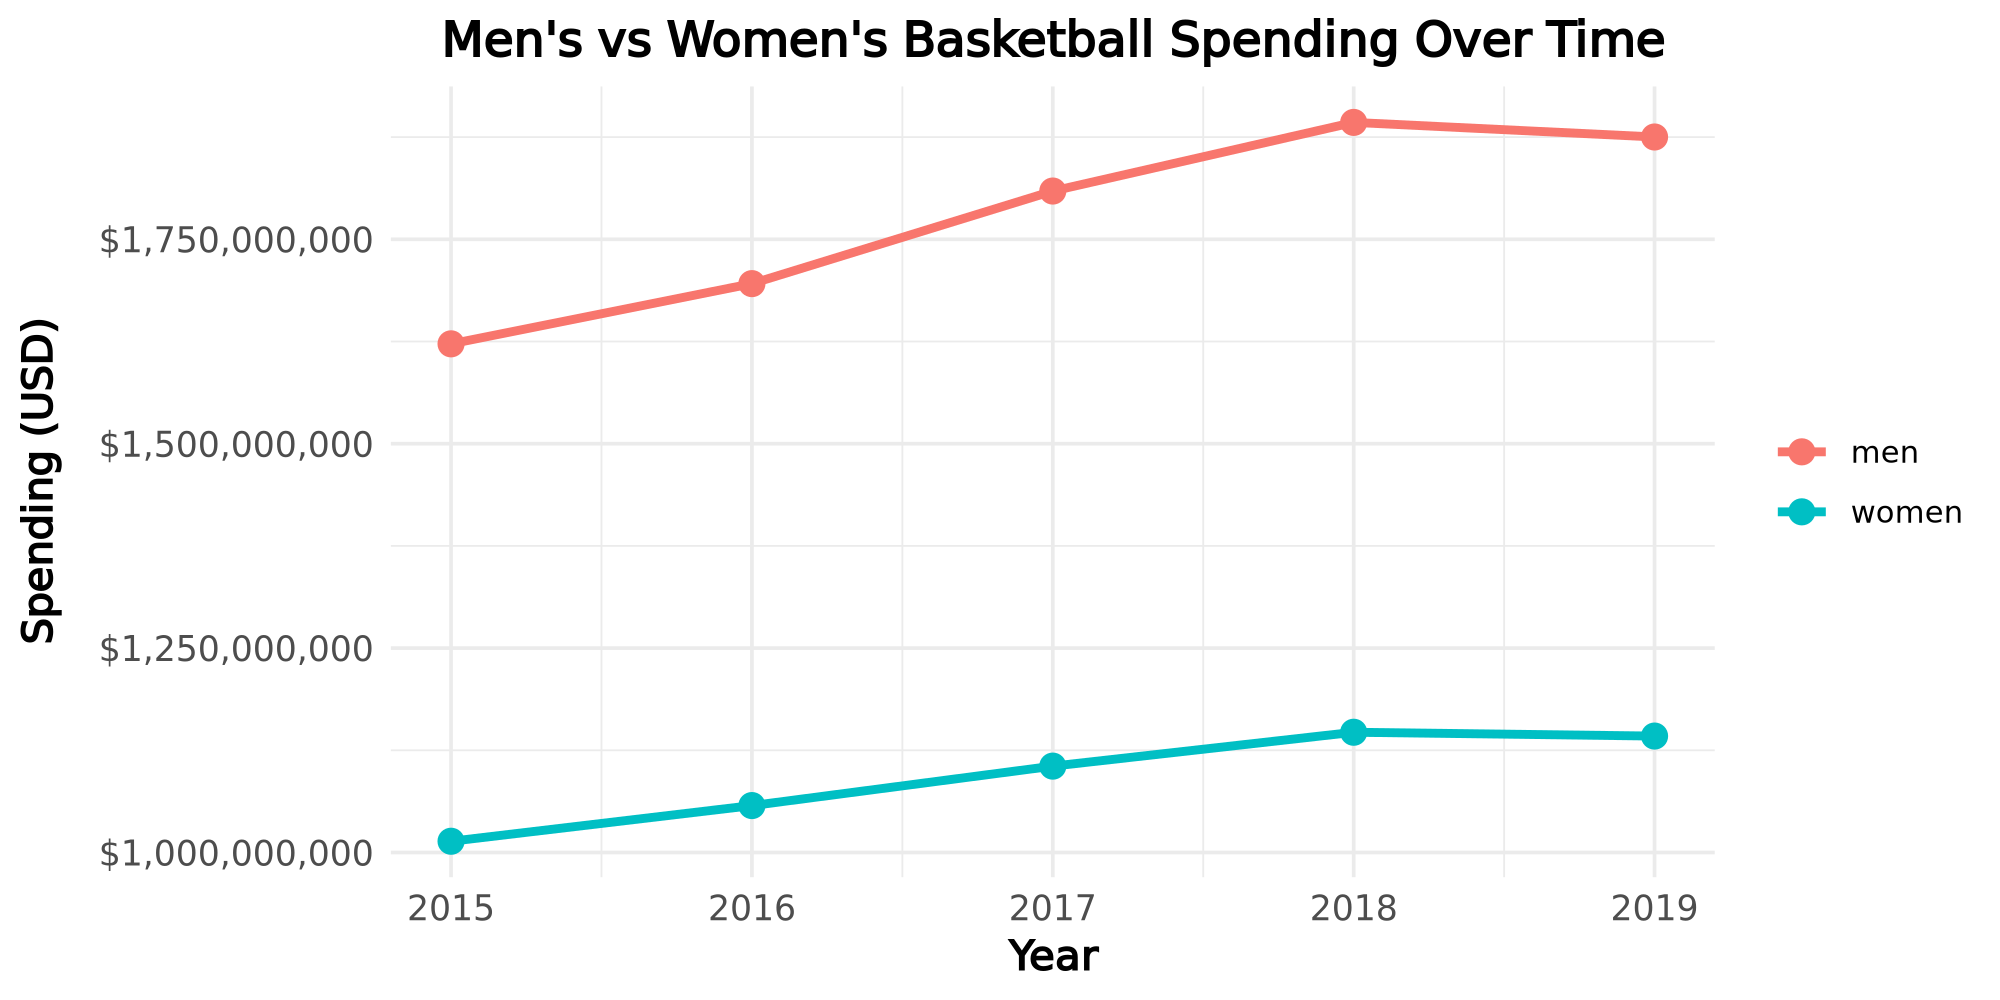

In [45]:
# line chart code goes here
ggplot(ncaa_sports_spending2, aes(x = year, y = expenditure_usd, color = men_or_women, group = men_or_women)) +
    geom_line(linewidth = 1.2) +  # 각 그룹에 대해 선을 그림
    geom_point(size = 3) +  # 각 점에 포인트 추가
    scale_y_continuous(labels = scales::dollar_format()) +  # y축에 달러 표시
    labs(x = "Year", y = "Spending (USD)", title = "Men's vs Women's Basketball Spending Over Time") +
    theme_minimal() +
    theme(
        plot.title = element_text(hjust = 0.5, face = 'bold', size = 14),  # 제목 중앙 정렬 및 스타일 설정
        axis.title = element_text(face = 'bold', size = 12),  # 축 제목 스타일 설정
        axis.text = element_text(size = 10),  # 축 텍스트 크기 설정
        legend.title = element_blank(),  # 범례 제목 제거
        axis.title.y = element_text(margin = margin(t = 0, r = 15, b = 0, l = 0, unit = "pt"))
    )

Uncomment and execute the code below to get a table for just UNC sports spending in 2019 called `unc_sports_spending_2019`.

In [46]:
unc_sports_spending_2019 = read_csv(data_url, col_types = cols()) |> 
    filter(institution_name == 'University of North Carolina at Chapel Hill', year == 2019) |>
    pivot_longer(c(exp_men, exp_women), names_to = 'men_or_women', values_to = 'expenditure_usd') |>
    arrange(rev(men_or_women), expenditure_usd) |>
    mutate(sports = fct_inorder(sports)) |>
    select(year, institution_name, sports, men_or_women, expenditure_usd) |>
    mutate(men_or_women = str_replace(men_or_women, 'exp_', '')) |>
    filter(!is.na(expenditure_usd))

Make a bar chart that compares spending across all sports for men versus women at UNC in 2019.

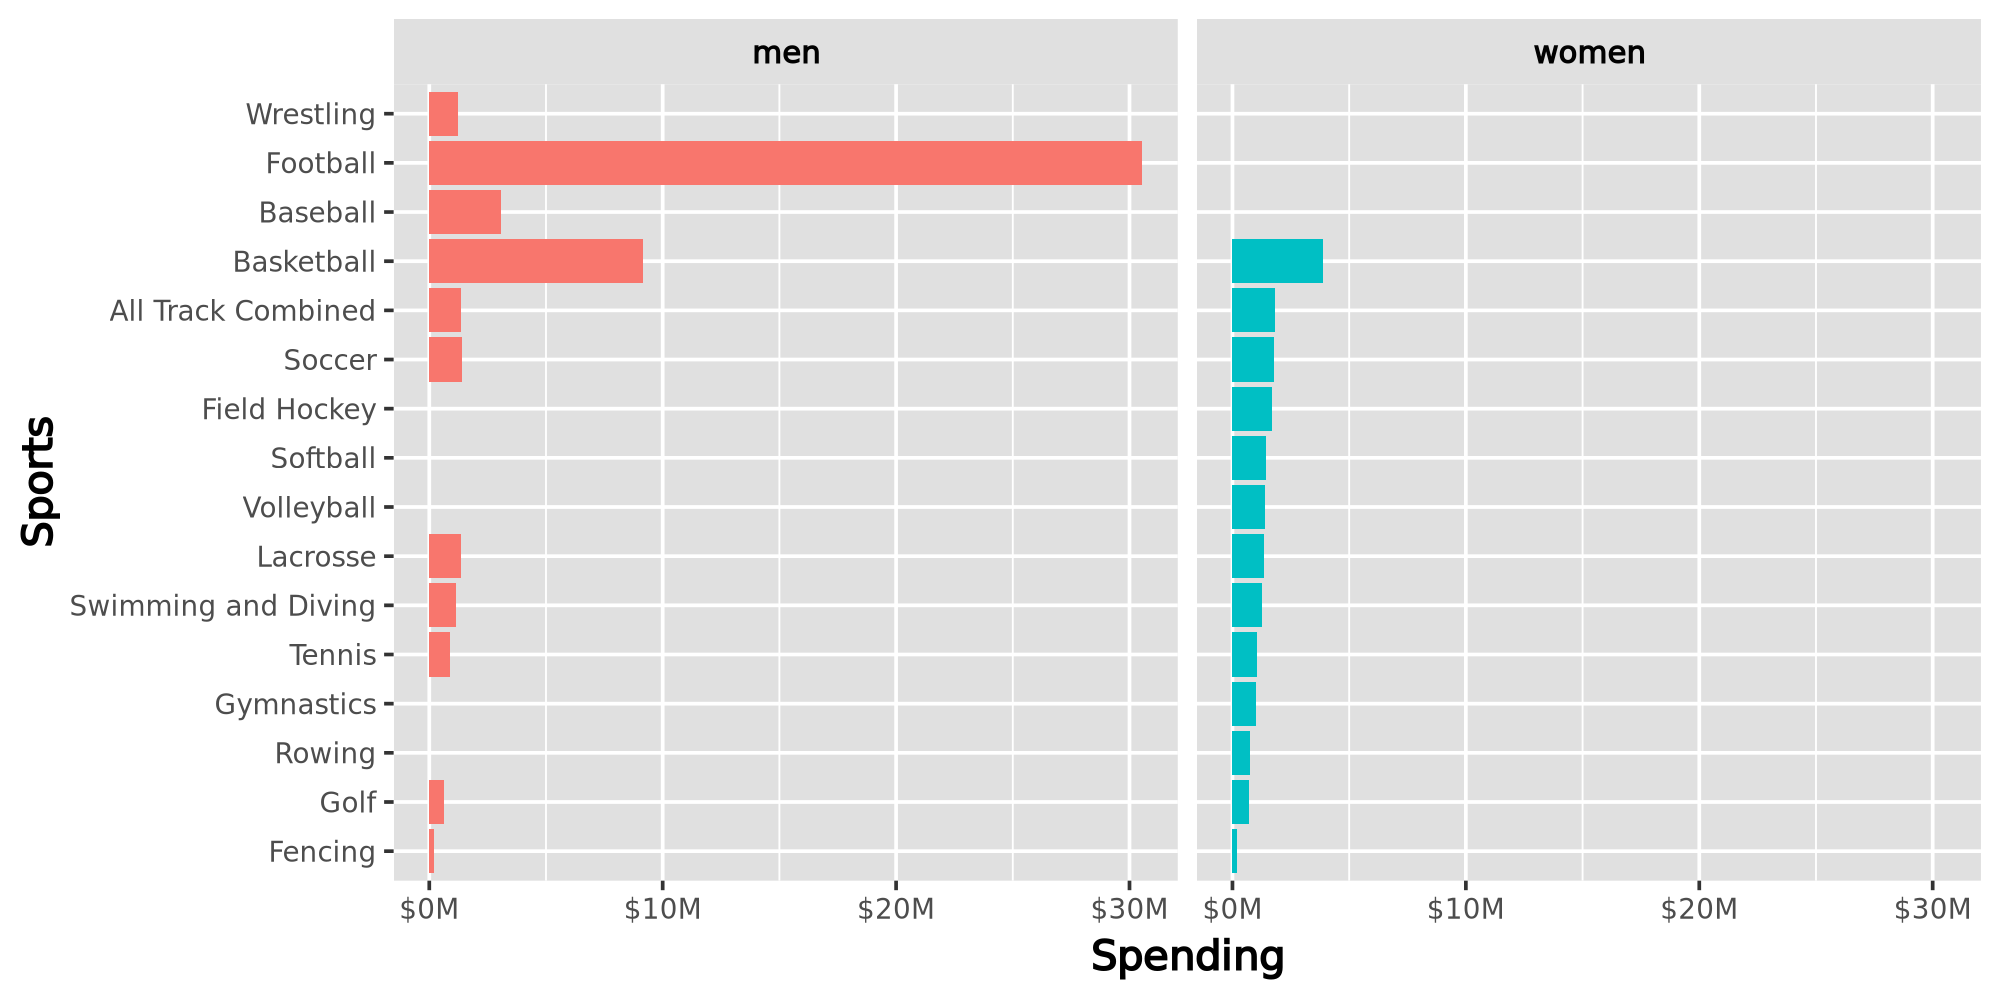

In [69]:
# bar chart code goes here
ggplot(unc_sports_spending_2019, aes(x = expenditure_usd / 1e6, y = sports, fill = men_or_women)) +
    geom_col(position = "dodge") +  # 막대 그래프, 남성과 여성의 지출을 나란히 비교
    facet_wrap(~ men_or_women) +  # 남성과 여성을 패싯으로 분리
    scale_x_continuous(labels = scales::dollar_format(suffix = "M")) +  # x축 달러 형식과 M 단위로 표시
    labs(x = "Spending", y = "Sports") +  # 축 제목 추가
    #theme_minimal() +
    theme(
        legend.position = 'none',
        panel.background = element_rect(fill = '#e0e0e0'),
        panel.grid.major = element_line(color = 'white'),
        panel.border = element_blank(),  # 패널의 테두리 제거
        #panel.grid.minor = element_blank(),
        strip.background = element_rect(fill = '#e0e0e0'),
        strip.text = element_text(hjust = 0.5, color = '#010101', face = 'bold'),
        plot.title = element_text(hjust = 0.5, face = 'bold', size = 14),  # 제목 중앙 정렬 및 스타일 설정
        axis.title = element_text(face = 'bold', size = 12),  # 축 제목 스타일 설정
        axis.text = element_text(size = 10),  # 축 텍스트 크기 설정
        axis.text.x = element_text(size = 8), 
        axis.text.y = element_text(size = 8), 
    )

You can find my solution [here](https://raw.githubusercontent.com/chuckpr/BIOS512/main/assignments/2023/unc_sports_spending.png). **Your chart does not need to look exactly like mine!**

To get the fancy dollar labels I had to do a couple things:

First my `weight` encoding was like this:
```r
weight = expenditure_usd / 1e6
```

Second, I added this to my chart adjust how my axis labels were presented:
```r
scale_x_continuous(labels = scales::dollar_format(suffix = 'M')) + labs(x = 'Spending')
```

**BONUS** 
Can you make sense of the code above? What does the `labs` function do for instance?